# Part I - Airport Data Exploration
## by Sidney D. Osborn

## Introduction
> I will be investigating a dataset involving statistics for the timeliness and other relevant logistics for airports in the United States. This data is taken from the U.S. Dept. of Transportation.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
airports = pd.read_csv('Airline_Delay_Cause.csv')

# high-level overview of data shape and composition
print(airports.shape)
print(airports.dtypes)
print(airports.info())
print(airports.describe())
print(airports.head(3))

(339106, 21)
year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339106 entries, 0 to 339105
Data columns (total 21 columns):
year                   339106 non-null int64
month                  339106 non-null int64
carrier                339106 non-null object
carrier_name           339106 non-null object
airport                339106

In [3]:
#identify where numerical data is missing.
airports.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            497
arr_del15              735
carrier_ct             497
weather_ct             497
nas_ct                 497
security_ct            497
late_aircraft_ct       497
arr_cancelled          497
arr_diverted           497
arr_delay              497
carrier_delay          497
weather_delay          497
nas_delay              497
security_delay         497
late_aircraft_delay    497
dtype: int64

In [4]:
#drop rows with missing data having empty values for the numerical rows as it will preprocess our data to be visualized.
airports2 = airports.dropna(subset=['arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'])

In [5]:
#Verify rows with empty numerical rows are eliminated.
print(airports2.isnull().sum())
print(airports2.shape)

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64
(338371, 21)


### What is the structure of your dataset?

> With the empty rows handled, there a 21 features with just over 338,000 rows containing information for individual flights.
> Here's a breakdown of what the columns are (in alphabetical order) given by the dataset orignator:
- 'airport': 'Airport Code for Arrival Airport',
- 'airport_name': 'Airport Name',
- 'arr_cancelled': 'Number of cancelled flights',
- 'arr_del15': 'Total number of delayed flights in the observation',
- 'arr_delay': 'Arrival delay in minutes',
- 'arr_diverted': 'Number of flights diverted',
- 'arr_flights': 'Total number of arriving flights in the observation',
- 'carrier': 'Airline carrier abbreviation',
- 'carrier_ct': 'Number of flights delayed due to air carrier (subset of 'arr_del15')',
- 'carrier_delay': 'Carrier delay in minutes (subset of arr_delay)',
- 'carrier_name': 'Airline carrier name',
- 'late_aircraft_ct': 'Number of flights delayed due to a previous flight using the same aircraft being late',
- 'late_aircraft_delay': 'Aircraft delay in minutes (subset of arr_delay)',
- 'month': 'Month (mm)',
- 'nas_ct': 'Number of flights delayed due to National Aviation System (subset 'of arr_del15)',
- 'nas_delay': 'National Aviation System in minutes (subset of arr_delay)',
- 'security_ct': 'Number of flights delayed due to airport security (subset of 'arr_del15)',
- 'security_delay': 'Security delay in minutes (subset of arr_delay)',
- 'weather_ct': 'Number of flights delayed due to weather (subset of arr_del15)',
- 'weather_delay': 'Weather delayed in minutes (subset of arr_delay)',
- 'year': 'Year (yyyy)'

### What is/are the main feature(s) of interest in your dataset?

> There are several interesting features that detail various kinds of delays flights in the dataset encounter. Some examples include delays due to weather, malfunctions of the National Aviation System (NAS), carrier-based delays and even delays due to the same plane type being late at the same arriving airport causing congestion in runway traffic.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think looking at each flight delay category and how it affects total flight delays can give us some insights on the most common delay types.

## Univariate Exploration

> Question: What is the distribution for total delayed flights?

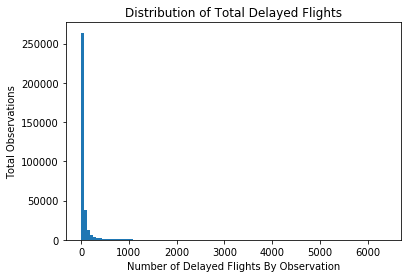

In [6]:
#Plot the total number of delayed flights as a histogram.
plt.hist(data=airports2, x='arr_del15', bins = 100)
plt.xlabel('Number of Delayed Flights By Observation')
plt.ylabel('Total Observations')
plt.title('Distribution of Total Delayed Flights');

We can see that most delay observations seem to have well below 50 delayed flights per obervation (airport). Let's try applying a log-scale transformation to see the distribution more upclose.

In [7]:
#define a function for plotting log-transformed histograms
def plot_delayed_flights_histogram(data, column, bin_size, y_limits, x_title, y_title, plot_title):
    """
    Plot a histogram of delayed flights based on the given data and parameters.

    Parameters:
    data (DataFrame): The DataFrame containing the data to be plotted.
    column (str): The column name containing the data to be used for plotting.
    bin_size (int): The number of bins for the histogram.
    y_limits (list): A list of two integers specifying the y-axis limits.
    x_title (str): The label for the x-axis.
    y_title (str): The label for the y-axis.
    plot_title (str): The title of the plot.

    Returns:
    None
    """
    plt.hist(data=data, x=column, bins=bin_size)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(plot_title)
    plt.ylim(y_limits)
    plt.xscale('log')
    plt.show();

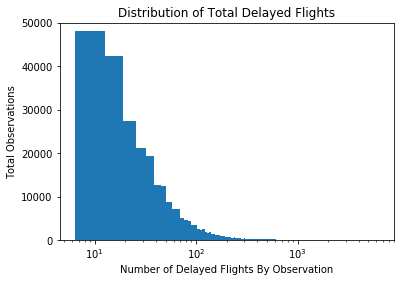

In [8]:
#Plot the total number of delayed flights as a histogram. Apply log transformation and adjust y-limits. Also increase bin size.
plot_delayed_flights_histogram(
    airports2, 
    'arr_del15', 
    1000, 
    [0, 50000], 
    'Number of Delayed Flights By Observation', 
    'Total Observations', 
    'Distribution of Total Delayed Flights')

We see more clearly that the distribution is heavilt skewed to the right. Considering it seems intuitive that most airports would have fewer overall delays, these results are what we'd want to see anyway. It seems that many airports have well below 100 delayed flights.

> Question: What is the distibution of cancelled flights?

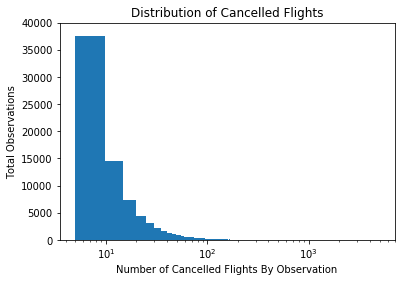

In [9]:
#Plot the total number of cancelled flights as a histogram. Use a log transformation to see the left-skewdness easier.
plot_delayed_flights_histogram(
    airports2, 
    'arr_cancelled', 
    1000, 
    [0, 40000], 
    'Number of Cancelled Flights By Observation', 
    'Total Observations', 
    'Distribution of Cancelled Flights')

The number of cancelled flights is releatively low for most airports, which is nice. It seems most of them have 10 or less per airport.

>Question: What is the distibution of total flights diverted?

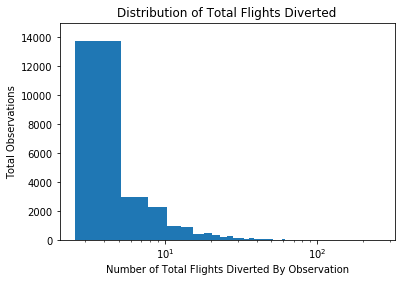

In [10]:
#Plot diverted flights
plot_delayed_flights_histogram(
    airports2, 
    'arr_diverted', 
    100, 
    [0, 15000], 
    'Number of Total Flights Diverted By Observation', 
    'Total Observations', 
    'Distribution of Total Flights Diverted')

It seems on average, most airports have well below 5 flights diverted.

>Question: What is the distribution fo the total number of flights per airport in our dataset? (This is the "good" number!)

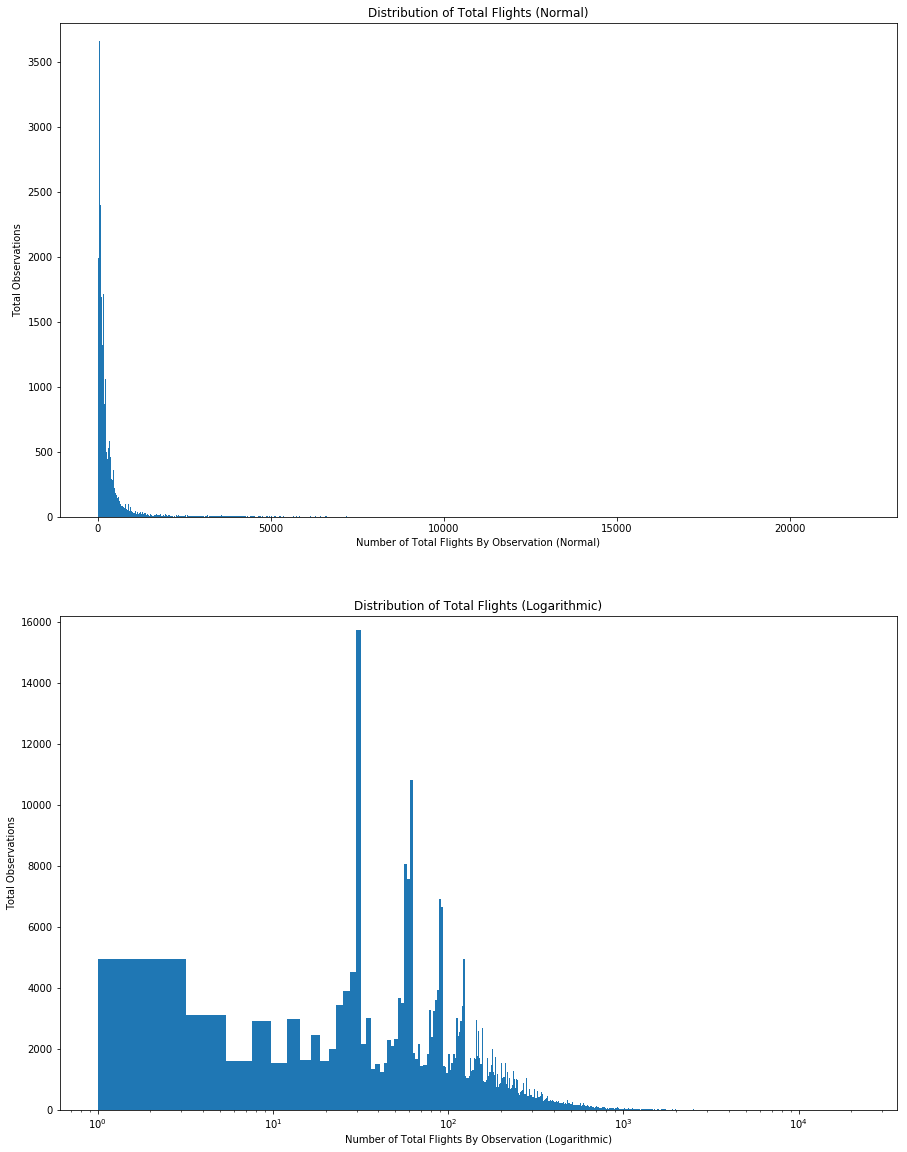

In [11]:
#Plot total (mostly successful?) flights. Use normal and log distributions.
plt.figure(figsize = [15, 20])

#Subplot for normal histogram.
plt.subplot(2, 1, 1)
plt.hist(data=airports2, x='arr_flights', bins = 10000)
plt.xlabel('Number of Total Flights By Observation (Normal)')
plt.ylabel('Total Observations')
plt.title('Distribution of Total Flights (Normal)')
plt.ylim([0, 3800]);

#Subplot for logarithmic histogram.
plt.subplot(2, 1, 2)
plt.hist(data=airports2, x='arr_flights', bins = 10000)
plt.xlabel('Number of Total Flights By Observation (Logarithmic)')
plt.ylabel('Total Observations')
plt.title('Distribution of Total Flights (Logarithmic)')
plt.ylim([0, 16200])
plt.xscale('log');

In the logarithmic distribution, there seems to be an interesting repeating pattern in the distribution as the number of flights increases beyond about halfway between 10^2 and 10^3 number of flight arrivals. This may warrant further investigation later. Let's take a closer look at the part with the pattern.

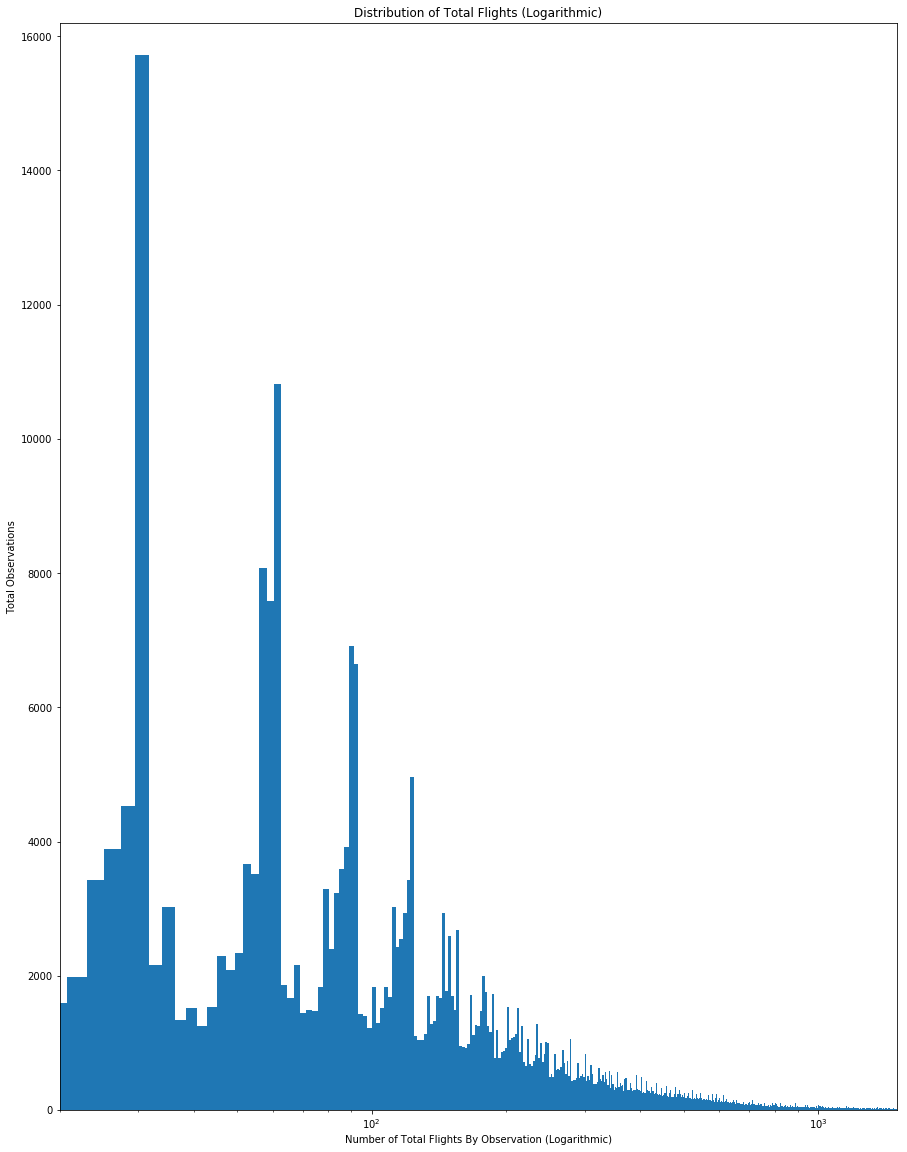

In [12]:
plt.figure(figsize = [15, 20])
plt.hist(data=airports2, x='arr_flights', bins = 10000)
plt.xlabel('Number of Total Flights By Observation (Logarithmic)')
plt.ylabel('Total Observations')
plt.title('Distribution of Total Flights (Logarithmic)')
plt.ylim([0, 16200])
plt.xlim([20, 1500])
plt.xscale('log');

This is an approximate repeating pattern that may warrant further investigation.

>Question: What are the distributions for the amount of time lost (in miuntes) due to weather delays, security delays, late aircraft delays, carrier delays and NAS delays? How do they compare to time spent for delays in general?

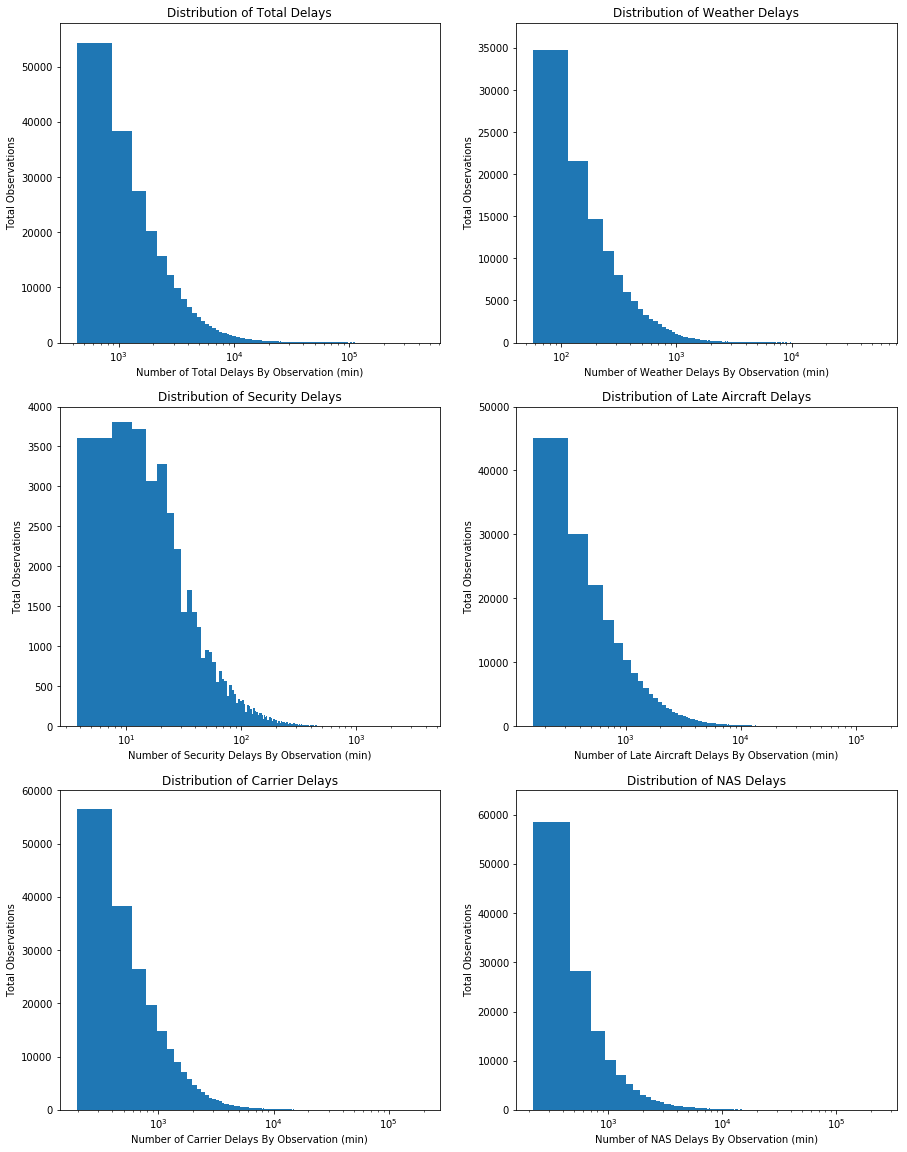

In [13]:
#Set the general figure size.
plt.figure(figsize = [15, 20])

#subplot for total delays
plt.subplot(3, 2, 1)
plt.hist(data=airports2, x='arr_delay', bins = 1000)
plt.xlabel('Number of Total Delays By Observation (min)')
plt.ylabel('Total Observations')
plt.title('Distribution of Total Delays')
plt.ylim([0, 58000])
plt.xscale('log');

#subplot for weather delays
plt.subplot(3, 2, 2)
plt.hist(data=airports2, x='weather_delay', bins = 1000)
plt.xlabel('Number of Weather Delays By Observation (min)')
plt.ylabel('Total Observations')
plt.title('Distribution of Weather Delays')
plt.ylim([0, 38000])
plt.xscale('log');

#subplot for security delays
plt.subplot(3, 2, 3)
plt.hist(data=airports2, x='security_delay', bins = 1000)
plt.xlabel('Number of Security Delays By Observation (min)')
plt.ylabel('Total Observations')
plt.title('Distribution of Security Delays')
plt.ylim([0, 4000])
plt.xscale('log');

#subplot for late aircraft delays
plt.subplot(3, 2, 4)
plt.hist(data=airports2, x='late_aircraft_delay', bins = 1000)
plt.xlabel('Number of Late Aircraft Delays By Observation (min)')
plt.ylabel('Total Observations')
plt.title('Distribution of Late Aircraft Delays')
plt.ylim([0, 50000])
plt.xscale('log');

#subplot for carrier delays
plt.subplot(3, 2, 5)
plt.hist(data=airports2, x='carrier_delay', bins = 1000)
plt.xlabel('Number of Carrier Delays By Observation (min)')
plt.ylabel('Total Observations')
plt.title('Distribution of Carrier Delays')
plt.ylim([0, 60000])
plt.xscale('log');

#subplot for NAS delays
plt.subplot(3, 2, 6)
plt.hist(data=airports2, x='nas_delay', bins = 1000)
plt.xlabel('Number of NAS Delays By Observation (min)')
plt.ylabel('Total Observations')
plt.title('Distribution of NAS Delays')
plt.ylim([0, 65000])
plt.xscale('log');

A few observations can be made here:
- First, the amount of total time caused by delays seems to be at least an order of magnitude higher than any of the subcategories of delay. (This isn't surprising since the other categories are subsets of the total time delay.) What is interesting is that every subcategory save security delays shares the same general shape as the total-time distribution. This suggests that time lost is almost always left-skewed.
- Second, delays due to weather ae about an order of magnitude less than late aircraft delays, NAS delays and carrier delays. This seems to suggest that the most of the delays are due to airport logistics challenges and not acts of God.
- Third, the the security delays in general are an order of magnitude or two less than the other categories, suggesting you can't blame TSA for making you miss your flight! (Although to be fair, a delay from over 10 to even over 100 minutes isn't impossible...)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The majority of my distributions are heavily left-skewed. This is to be hoped for since you don't want delays of any kind. I used log transformations for most of my visualizations to more easily show the skewdness and raw numbers since this is a larger dataset. Interestingly though, there is a curious repeting pattern within the log-transformed total flights distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The total flights has a curious repeating pattern when log-transformed. I first removed values from the dataset in order to not have rows that lacked numerical data necessary for plotting. Then log-transforming the distributions allowed me to show the raw numbers in a way that was more intuitive and visually pleasing.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> Question: What is the relationship between total flights and total delays?

In [14]:
#create scatterplot function to avoid repetetive codeing
def airport_scatter_plot(data, x_column, y_column, x_label, y_label, plot_title):
    """
    Create a scatter plot with a regression line using Seaborn.

    Parameters:
    data (DataFrame): The DataFrame containing the data to be plotted.
    x_column (str): The column name for the x-axis data.
    y_column (str): The column name for the y-axis data.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    plot_title (str): The title of the plot.

    Returns:
    None
    """
    sns.regplot(data=data, x=x_column, y=y_column)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.show();

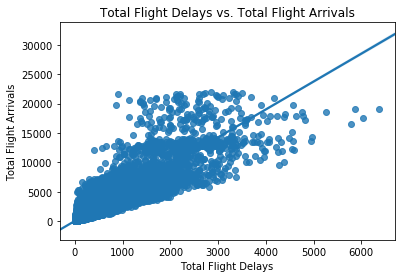

In [15]:
#plot total fight delays vs. total flight arrivals
airport_scatter_plot(airports2, 
    'arr_del15', 
    'arr_flights', 
    'Total Flight Delays', 
    'Total Flight Arrivals', 
    'Total Flight Delays vs. Total Flight Arrivals')

In [16]:
#calculate correlation
print(airports2['arr_del15'].corr(airports2['arr_flights']))

0.920235532832


It's more clear in this bivariate plot that flight arrivals is positively correlated with flight delays. We can see at a glance that for every 20000 flights, there may be at most 6000 delays, though usually much lower.

> Question: What is the relationship between the total number of flights and flight diversions?

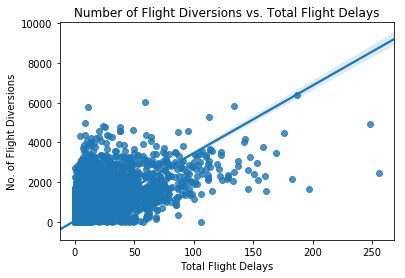

In [17]:
#plot total flight arrivals vs. total fight delays
airport_scatter_plot(airports2, 
    'arr_diverted', 
    'arr_del15', 
    'Total Flight Delays', 
    'No. of Flight Diversions', 
    'Number of Flight Diversions vs. Total Flight Delays')

In [18]:
#calculate correlation
print(airports2['arr_del15'].corr(airports2['arr_diverted']))

0.670318794546


While there is a positive correlation between total delays and diversions, it is not a strong one. Given these are independent categories, this is not surprising. However, it does seem that is is much more common for flights to be delayed than diverted. (For the average passenger, this is probably preferred anyway. Better to be late than in the wrong destination!).

> Question: What is the relationship between total delays and flight cancellations?

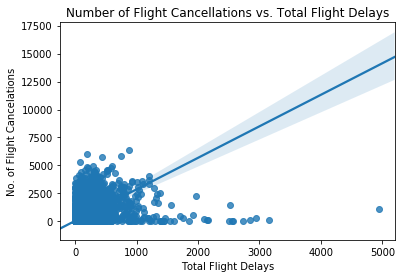

In [19]:
#plot flight cancellations vs. total fight delays
airport_scatter_plot(airports2, 
    'arr_cancelled', 
    'arr_del15', 
    'Total Flight Delays', 
    'No. of Flight Cancelations', 
    'Number of Flight Cancellations vs. Total Flight Delays')

In [20]:
#calculate correlation
print(airports2['arr_del15'].corr(airports2['arr_cancelled']))

0.525271886769


There is a poor correlation between flight cancellations and total flight delays. There a still more delays than cancellations, but given how the airline tends to overbook many flights, it's not surprising that there is still more cancellations compred to the diversions from the prvious plot. There is a curious outlier at almost 5000 cancellations, too.

> Question: What is the breakdown of total flight delays by carrier?

In [21]:
#Get a list of the carriers
print(airports2.carrier.value_counts().count())
print(airports2.carrier.value_counts())

29
OO    41093
DL    29058
MQ    26763
EV    26696
AA    21079
UA    20317
WN    18753
YV    15370
AS    13865
9E    13622
OH    13520
F9    13224
B6    12293
US    10692
NW     8068
G4     7726
XE     7366
FL     6955
CO     6908
YX     5381
NK     4437
RU     4134
HA     3796
DH     1923
HP     1579
VX     1425
QX     1157
TZ      918
AQ      253
Name: carrier, dtype: int64


There are 29 carriers. Let's now look at a breakdown of the number of total delays by carrier. We will use a box plot and violin plot.

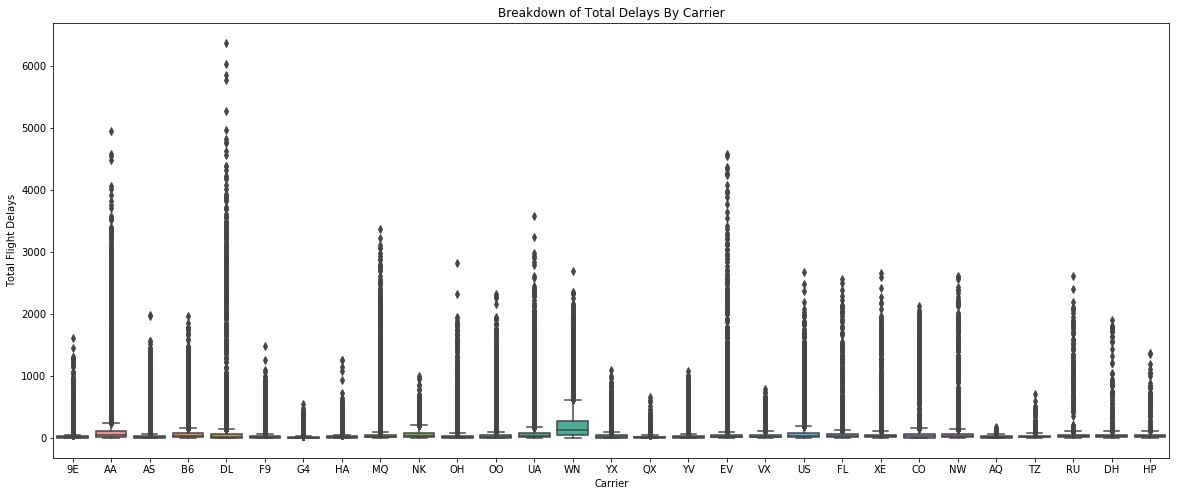

In [22]:
#box plot of total delays by carrier
plt.figure(figsize = [20, 8])
sns.boxplot(data=airports2, x='carrier', y='arr_del15')
plt.xlabel('Carrier')
plt.ylabel('Total Flight Delays')
plt.title('Breakdown of Total Delays By Carrier');

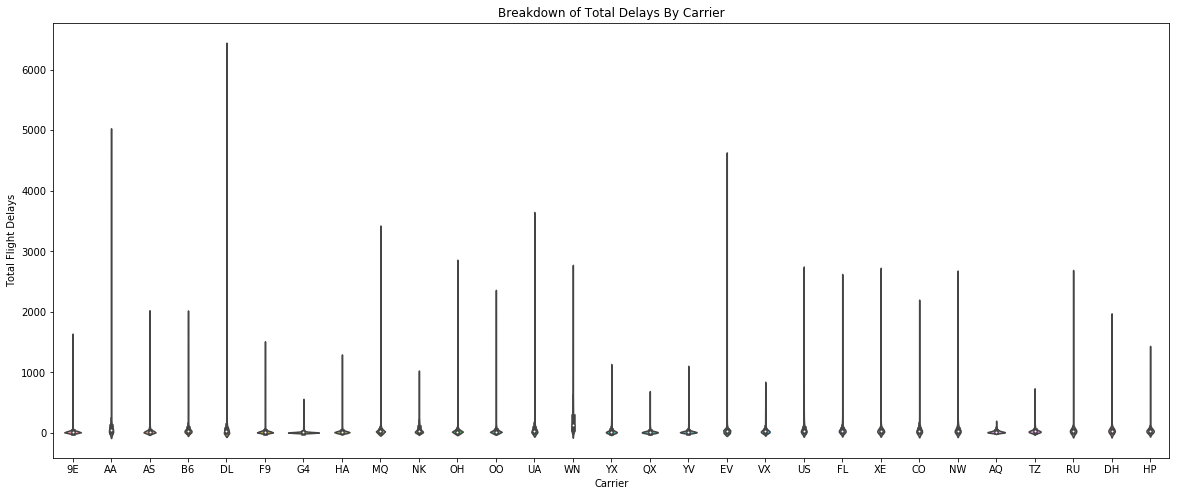

In [23]:
#violin plot of total delays by carrier
plt.figure(figsize = [20, 8])
sns.violinplot(data=airports2, x='carrier', y='arr_del15')
plt.xlabel('Carrier')
plt.ylabel('Total Flight Delays')
plt.title('Breakdown of Total Delays By Carrier');

With this many carriers, it's not as obvious from the violin plot, but carrier 'WN' has a slightly greater spread between the queartiles. It is, however, obvious that the medians of all of the carriers seem to be well below 500 delays. Though there are several outliers above the 3rd quartile of each plot, suggesting that while high numbers of cancellations in each observation are uncommon, they are not necessarily rare.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For the scatterplots showing the relationships between total delays and cancellations and diversions and total flights. the correlation was strong for total flights.

>The box and violin plots show how the number of delays per carrier typically have a low number of delays on a per capita basis.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> While one wouldn't expect the relationships between total delays and cancellations and diversions would be directly correlary, it was interesting to see the way they compared even though the statistical correlation ws a bit weak. It was also useful to see how the raw score of the cancellations and diversions compared with the total delays. In general, the numbers were lower.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> Question: What are the relationships across all of the delay types?

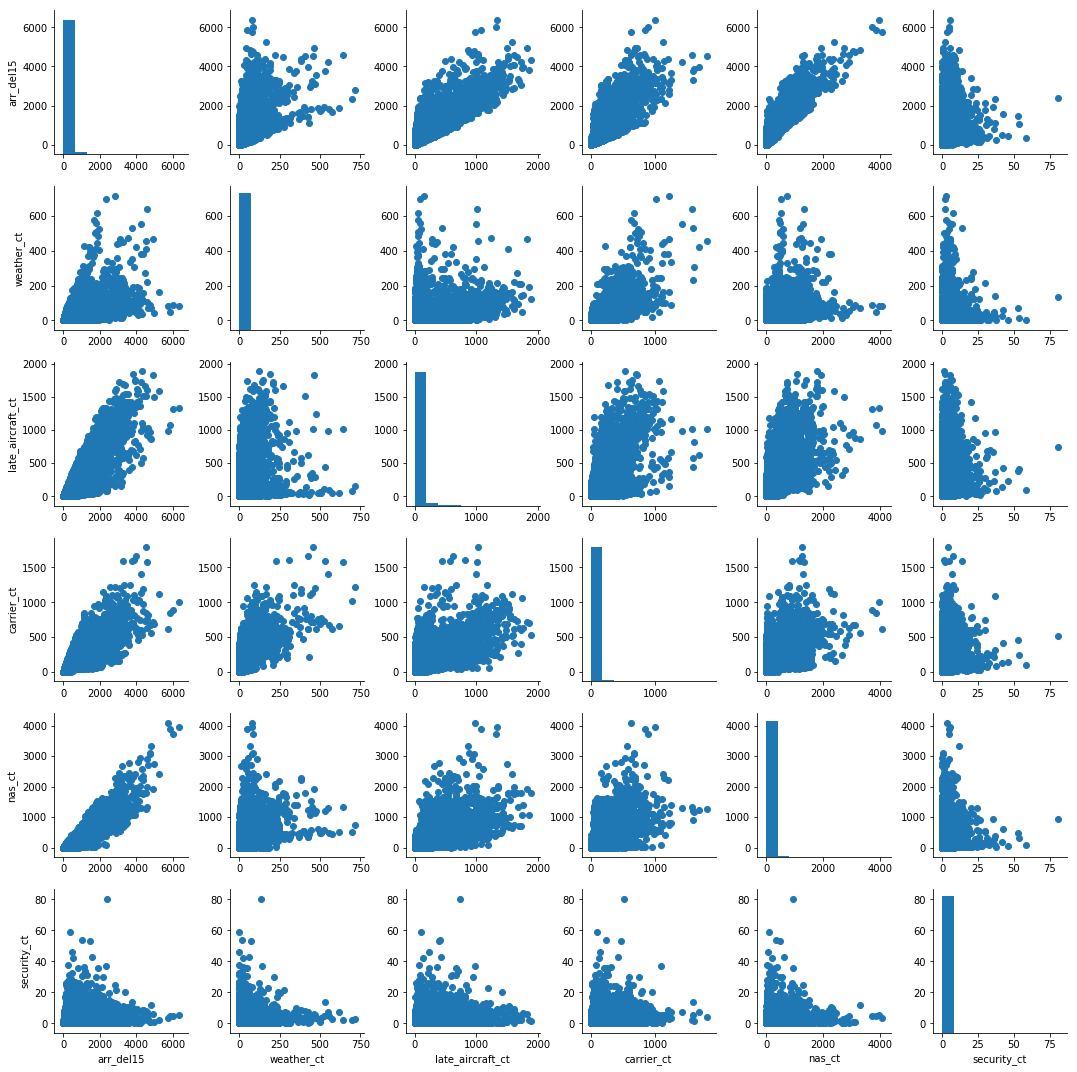

In [24]:
#use a plot matrix to look at everything at once!
g = sns.PairGrid(data = airports2, vars = ['arr_del15', 'weather_ct', 'late_aircraft_ct', 'carrier_ct', 'nas_ct', 'security_ct']);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

In [25]:
#calculate correlation
print(airports2['arr_del15'].corr(airports2['weather_ct']))
print(airports2['arr_del15'].corr(airports2['late_aircraft_ct']))
print(airports2['arr_del15'].corr(airports2['carrier_ct']))
print(airports2['arr_del15'].corr(airports2['nas_ct']))
print(airports2['arr_del15'].corr(airports2['security_ct']));

0.669287662862
0.933753189225
0.909239540619
0.917739190061
0.486793592484


This shows for many vaiables that as the number of y-axis observations increase, so do the number of x-axis observations. An example of this is the positive relationhip between the number of NAS cancellations increasing with the number of total delays. When looking at the correlation coefficients, it seems the relationship between total delays and weather and NAS delays are weak. This could be due to the fewer observations or true lesser impact on total delays. Let's see whether applying transformations.

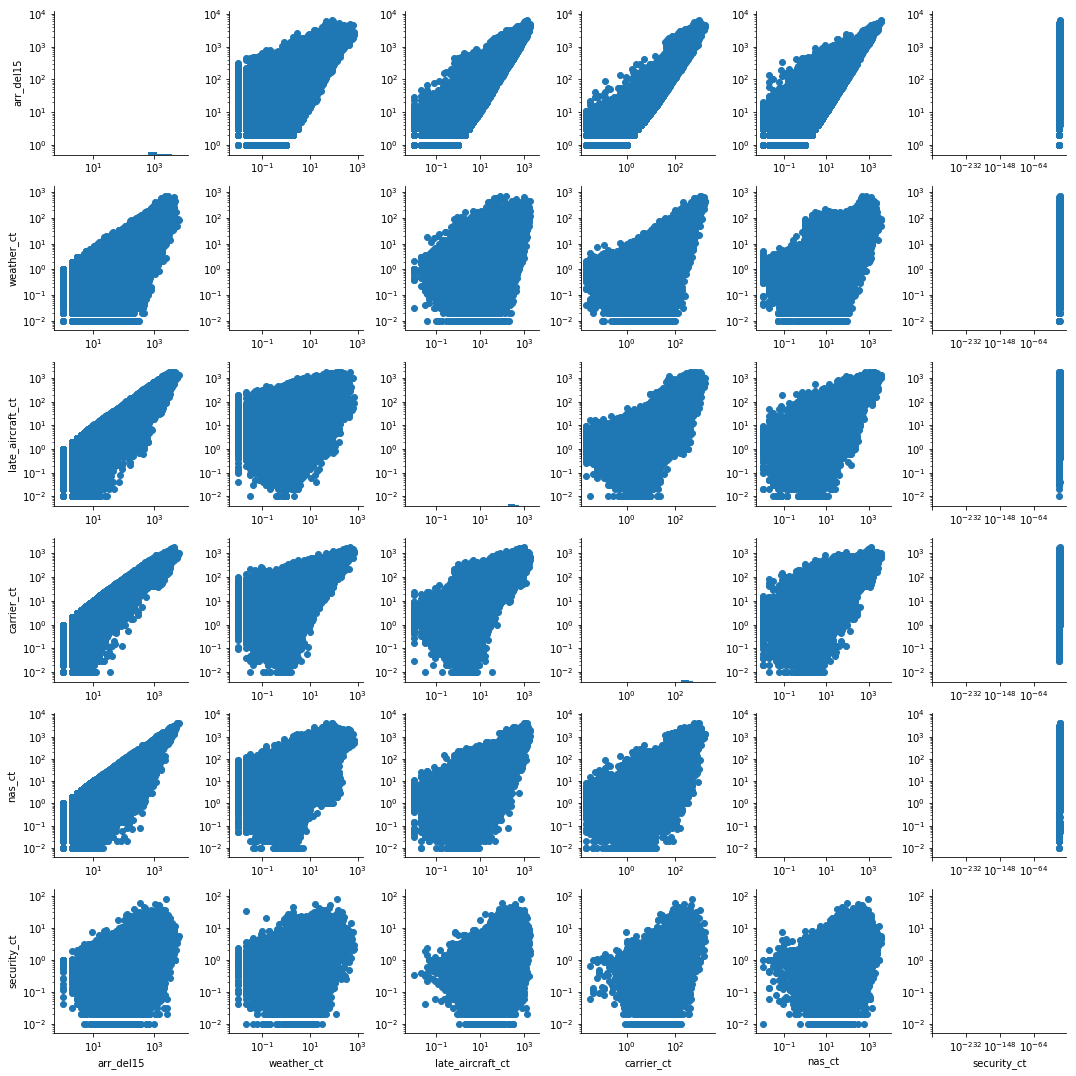

In [26]:
#use a plot matrix to look at everything at once! (Using a log transformation)
g = sns.PairGrid(data = airports2, vars = ['arr_del15', 'weather_ct', 'late_aircraft_ct', 'carrier_ct', 'nas_ct', 'security_ct']);
g.set(xscale='log', yscale='log')
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

There doesn't seem to be a strong general correlation between the variables. As may come as no surpise, total delays do, however, have a general positive relationship with all variables with the possible exception of security. The log transformations don't help much either. :et's try one more approach using a log transformation only on the x-axis.

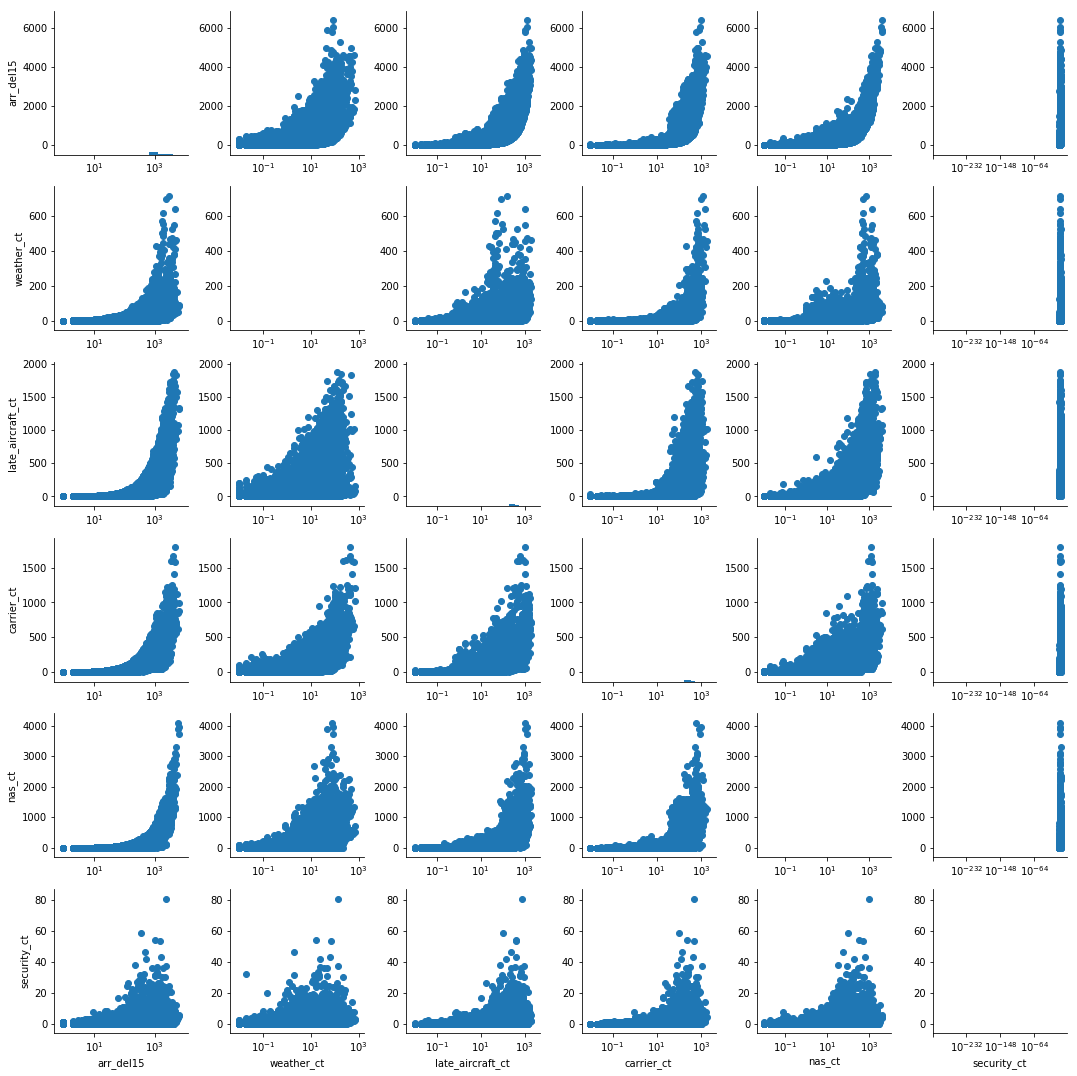

In [27]:
#use a plot matrix to look at everything at once! (Using a log transformation)
g = sns.PairGrid(data = airports2, vars = ['arr_del15', 'weather_ct', 'late_aircraft_ct', 'carrier_ct', 'nas_ct', 'security_ct']);
g.set(xscale='log')
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

From the x-axis log transformation, it's more obvious for most of the variable that as y- and x-axis variables increase, there is an obvious, if slow, increase of x-axis observations as the magnitude increases along the x-axis of each plot. One thing this makes obvious is that most variables are at least somewhat positively correlated. This is more obvious here than the plots above withput the transformations.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the non-transfomed plots, we see direct correlation between the variables plotted directly against total delays.

### Were there any interesting or surprising interactions between features?

> While not as obvious in the regular plots, when log-transformed the variables show a steady increase in their x-axis growth as magintude increases.

## Conclusions
>This is a summary of my main findings.
- As the data columns are mostly numerical, I decided to use several histograms and scatterplots to emphasize the relationships between vriables. I focused mostly on plotting other variables against total flght dalays or sometimes total flights. It is worth noting that many of the numerical variables are subsets of the toal flights variable, and thus will be tied into them. Nevertheless, see the breakdown by things like delays due to late aircraft or security checks was useful to see in plotted form, especially when logarithmically transformed. This seems true for the variables that report time lost (in minutes), as well against total delay time lost.
- I plotted total delays against total flights. Not surprisingly, the correlation was positive.
- I plotted total flight delays against simlar yet unrelated categories such as cancellations and diversions. We see fewer cancellations compared to delays and even fewer diversions. I am not personally familiar with airline logistics, but it would be interesting to see if these breakdowns match the usual statistics we see in the airline industry in the United States and abroad.
- When doing box and violin plots for carrier delays, we see that all the carrier report fewerr than 500 delays for the timeframe of the dataset, although it isn't impossible to see a handful of much higher numbers. This latter spread of outliers is where we see the most variation within the carriers.
- The interesting pattern in the Total Flights histograms and other items of interest noted throughout my report can be expanded on in future investigations.
- Finally, when we plot total delay time count against all of the subcategory variables like weather, security, etc., delays to see how they compare using a plit matrix. WHen the x-axis variable is log-transformed, we see all of the variables increase as the x-axis magnitude increases. However, the first column of plots shown in the untransformed plot may be more useful, as it shows the direct breakdwon of delay subcaetegory plotted against total delays. The correlations calculated seem to confirm this finding.